# The task at hand is sentiment classification using Natural Language Processing.
# I have classified the tweets by implementing Sentiment analysis on the dataset link I was provided. The objective was to recognize whether the given tweet is oriented as negative (-1), neutral (0), or positive (1) tone. 

## dataset link: https://www.kaggle.com/saurabhshahane/twitter-sentiment-dataset

### I'll be explaining what's happening in the code(IN DETAIL) here: 
#### 1. I start off by calling the necessary modules and required libraries for the problem statement. Before running this file, do make sure you have wordcloud installed in your local system. wordcloud will essentially be used further on for visual display of positive and negative phrases in tweets.
#### 2. Next, I import the dataset, the link to which is given above. I've created a dataframe that references the csv file, and all operations will be carried out in this data frame. 
#### 3. Now, I perform exploratory data analysis on my data. I check for null values, unique values, remove any clean text categorized null values from my dataset. I implement boxplot for graphically depicting groups of numerical data
#### 4. Next, we move onto data pre-processing. Removal of stop words and lemmatization is done using the nltk toolkit. I have printed the words using word cloud as mentioned before, and if the category equals 1, i've displayed positive words, if it's zero, i have displayed neutral words, and if it's -1, i've displayed negative words.
#### 5. Now, I perform feature extraction using count vectorizer. I call the fit() function to learn vocabulary from my 'clean_text' column and then I split the data into testing and training data set, and use the transform function to encode each of them as a vector.
#### 6. One-vs-all strategy is used to implement a logistic regression model for my problem statement. I've used logistic regression because it's the most efficient classification algorithm.
#### 7. I proceed to find the mean training accuracy, and display a confusion matrix for the same.
#### 8.  F1-score, or F-measure is also mentioned here. This is also a measure of the text accuracy. 
#### 9. Now, I use a tfidf vectorizer, which converts a collection of raw documents to TF-IDF features. You will notice that i have not used a count Vectorizer here. If i do use a count Vectorizer followed by TFIDF transformer instead, this step can be replaced with that.
#### 10. Keras Tokenize. {fit_on_texts} Updates internal vocabulary based on a list of texts. {texts_to_sequences} Transforms each text in texts to a sequence of integers. and finally, {pad_sequences} to tranform a list of sequences into a 2D array. 
#### 11. Next, i create a sequential model. It's preferred when each layer has exactly one input tensor and one output tensor, as is required by the problem statement.
#### 12. Now i use .fit() to fit my model to the training data. I have run it through 15 epochs, which essentially means the number of times that the learning algorithm will work through the entire training dataset(which is 15 times)
#### 13. Finally, I perform step 8 again, this time taking X_val in consideration. I get my classification report.
#### 14. Don't forget to use .argmax(val_preds,axis=1) after defining val_preds. It's a 2D array, and it throws a Classification metrics can't handle a mix of multiclass and continuous-multioutput targets error.
#### 14. This commences my entry for this task, thank you for giving me this opportunity. 

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense, Dropout, SpatialDropout1D, LSTM

In [2]:
df = pd.read_csv("Twitter_Data.csv")
df.shape

(162980, 2)

In [3]:
df.head()

clean_text  category
0  when modi promised “minimum government maximum...      -1.0
1  talk all the nonsense and continue all the dra...       0.0
2  what did just say vote for modi  welcome bjp t...       1.0
3  asking his supporters prefix chowkidar their n...       1.0
4  answer who among these the most powerful world...       1.0

In [4]:
df.category.unique()

array([-1.,  0.,  1., nan])

In [5]:
df.isna().sum()

clean_text    4
category      7
dtype: int64

In [6]:
df[df['category'].isna()]

clean_text  category
130448  the foundation stone northeast gas grid inaugu...       NaN
155642  dear terrorists you can run but you cant hide ...       NaN
155698  offense the best defence with mission shakti m...       NaN
155770  have always heard politicians backing out thei...       NaN
158693  modi government plans felicitate the faceless ...       NaN
159442               chidambaram gives praises modinomics       NaN
160559  the reason why modi contested from seats 2014 ...       NaN

In [7]:
df[df['clean_text'].isna()]

clean_text  category
148           NaN       0.0
158694        NaN      -1.0
159443        NaN       0.0
160560        NaN       1.0

In [8]:
df.drop(df[df['clean_text'].isna()].index, inplace=True)
df.drop(df[df['category'].isna()].index, inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162969 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162969 non-null  object 
 1   category    162969 non-null  float64
dtypes: float64(1), object(1)
memory usage: 3.7+ MB


<AxesSubplot:xlabel='category'>

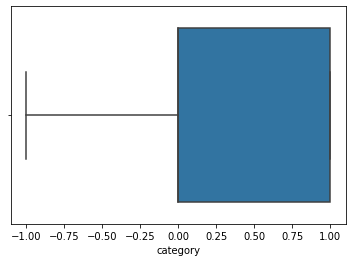

In [10]:
sns.boxplot(x=df['category'])

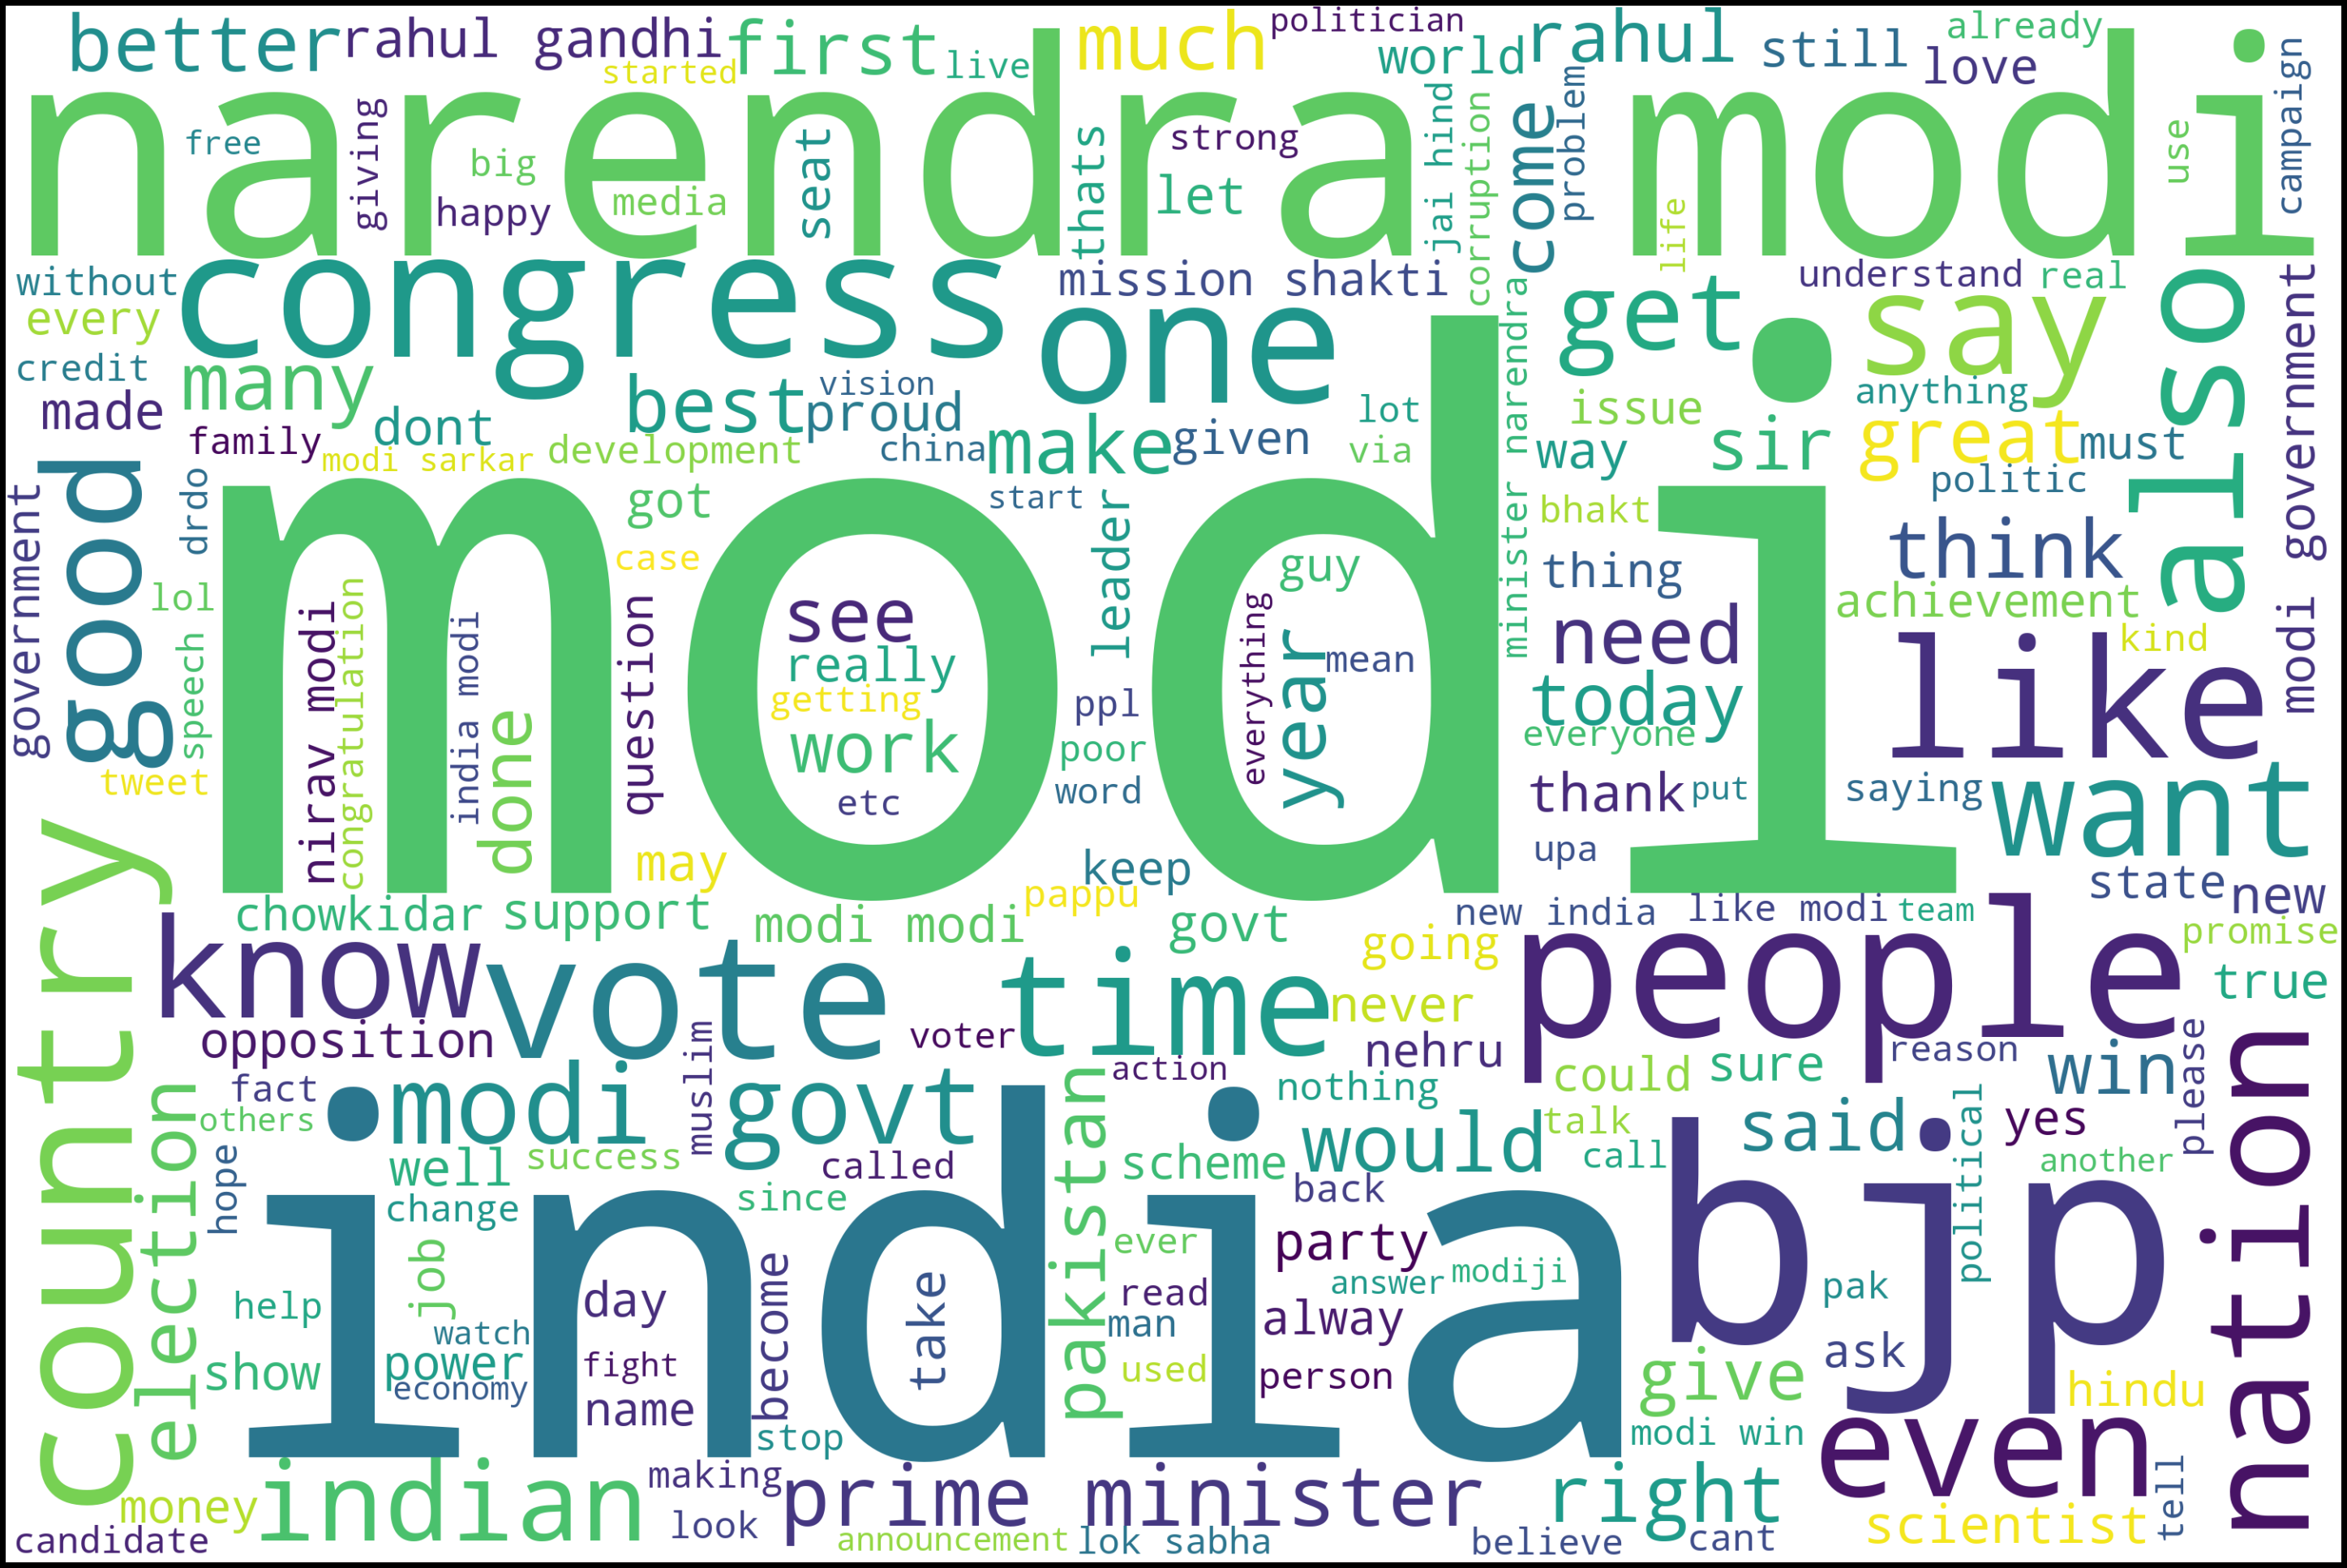

In [12]:
# positive tweets

text = ''

for tweet in df[df['category'] == 1.0]['clean_text']:
    text += f" {tweet}"
    
wordcloud = WordCloud(
width=3000, height=2000, background_color='white',
stopwords = set(nltk.corpus.stopwords.words("english"))).generate(text)

fig = plt.figure(figsize=(40,30), facecolor='k',edgecolor='k')

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show

del text

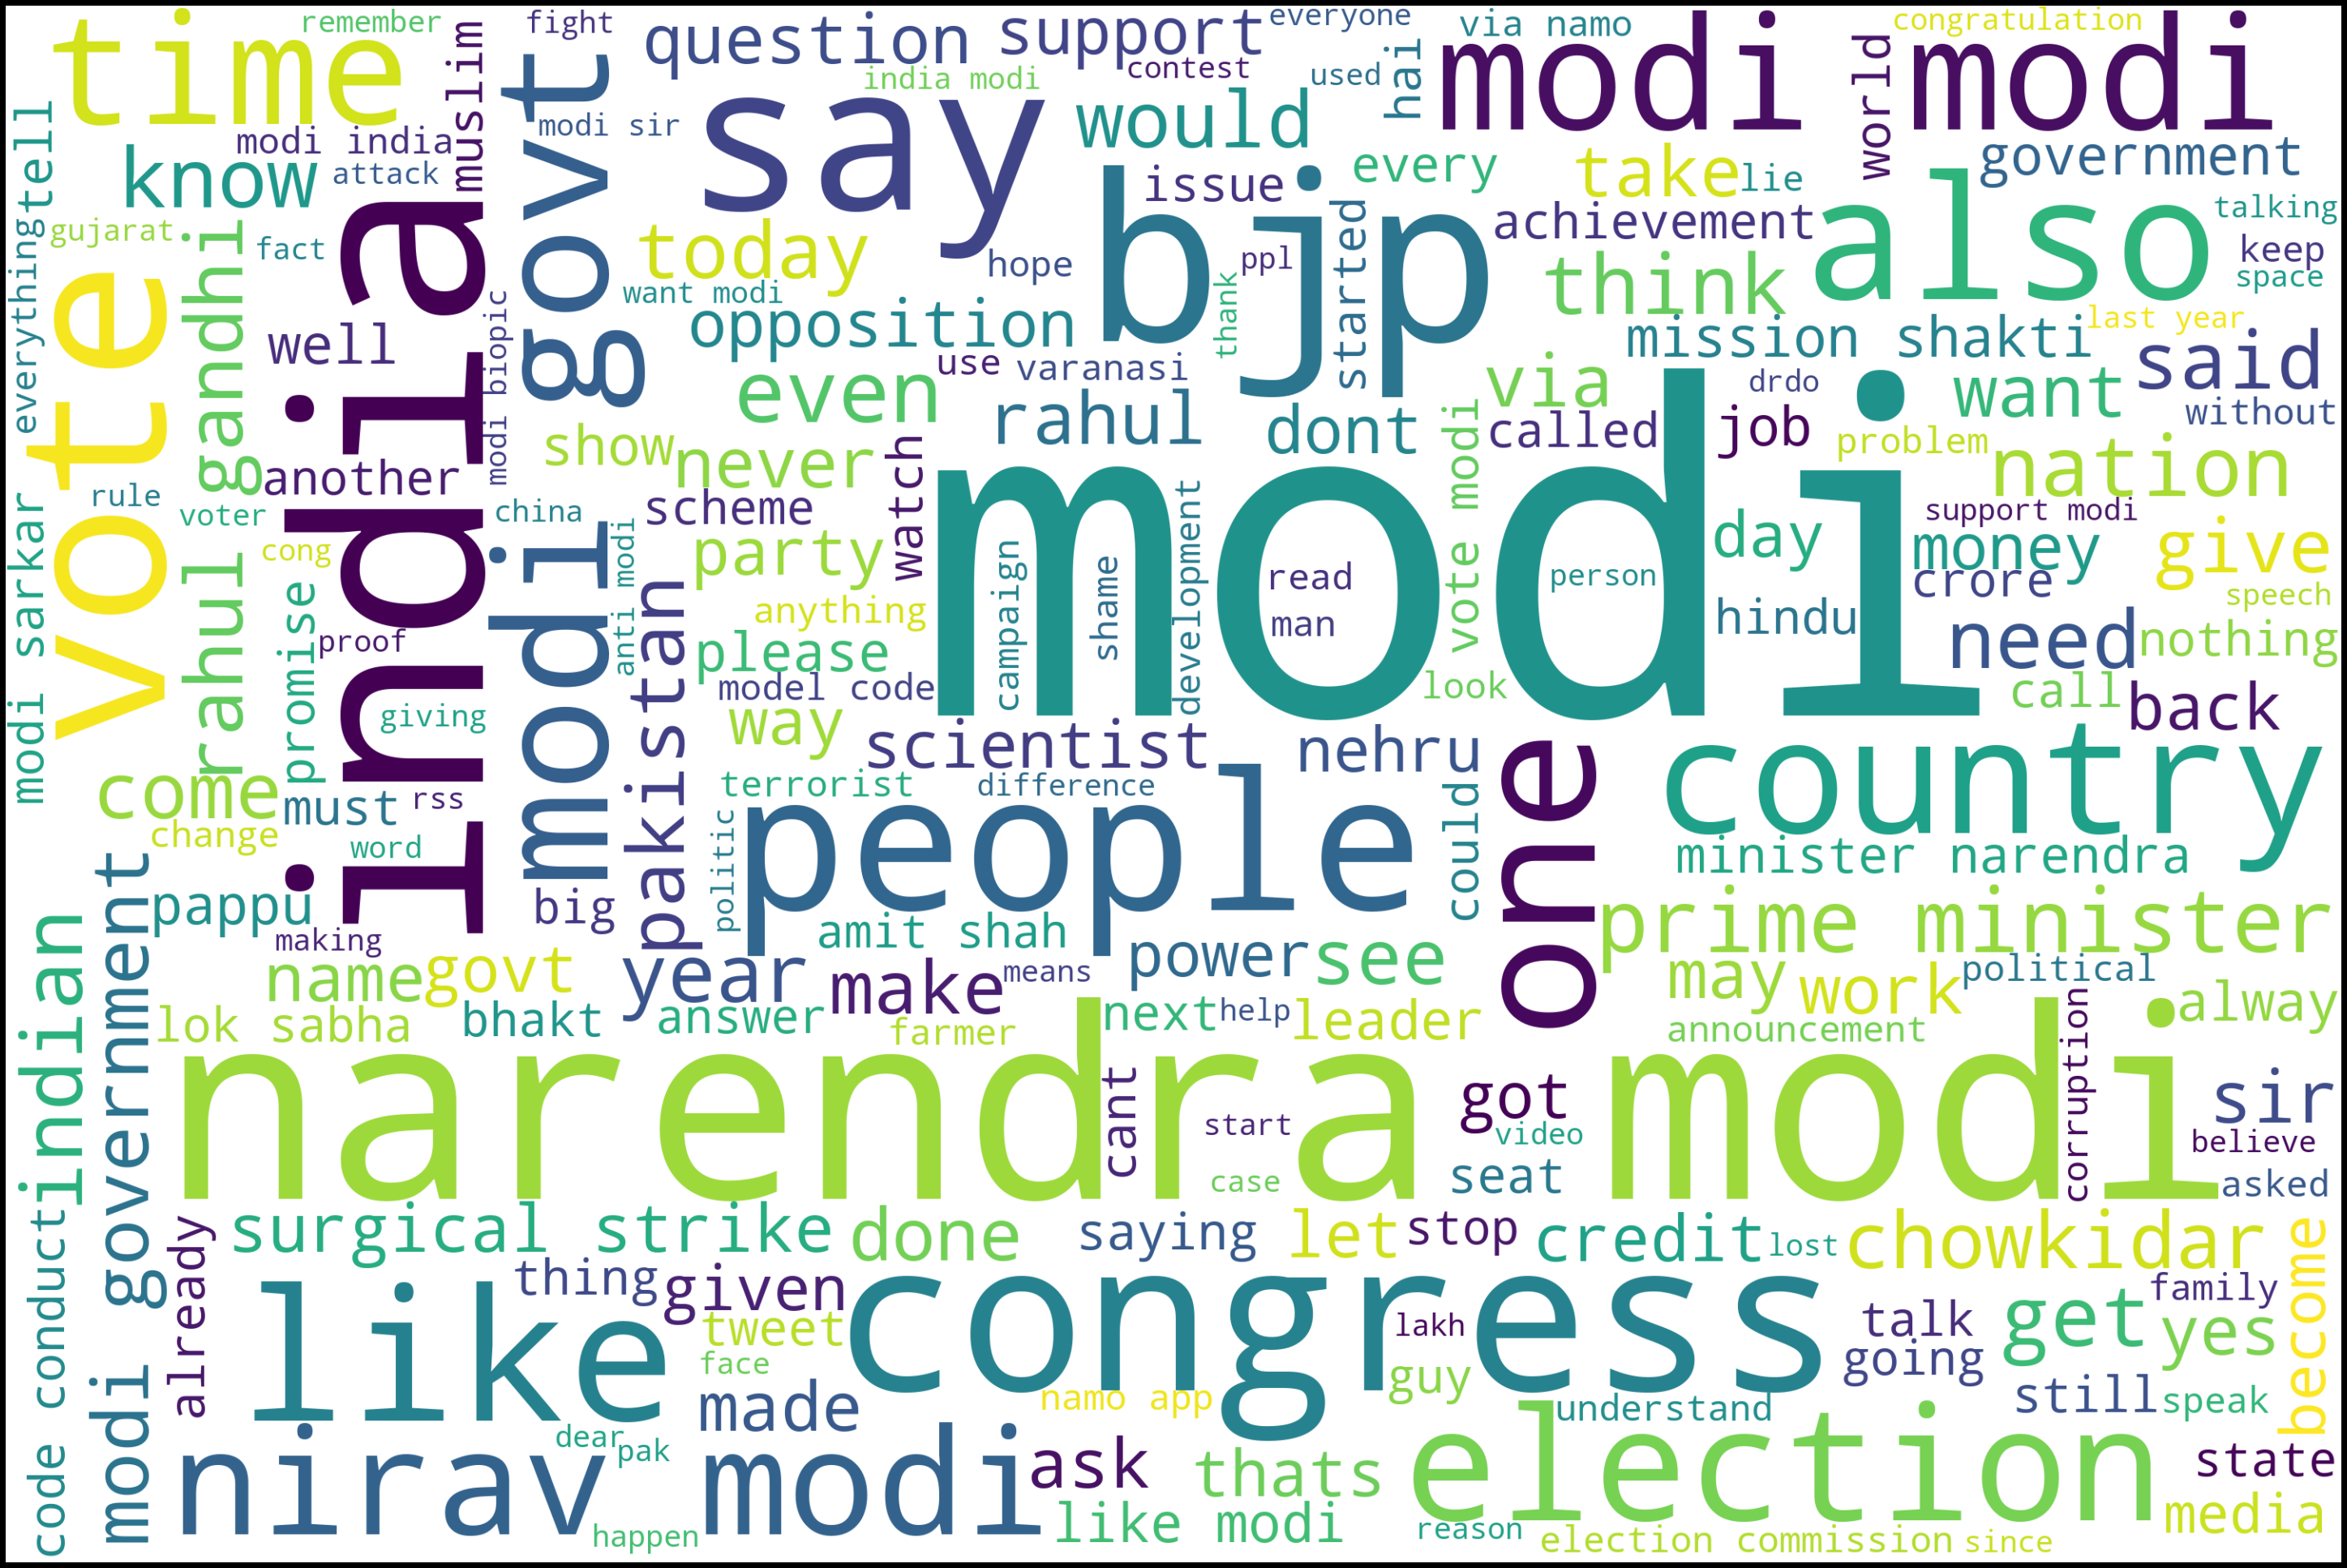

In [39]:
# positive tweets

text = ''

for tweet in df[df['category'] == 0.0]['clean_text']:
    text += f" {tweet}"
    
wordcloud = WordCloud(
width=3000, height=2000, background_color='white',
stopwords = set(nltk.corpus.stopwords.words("english"))).generate(text)

fig = plt.figure(figsize=(40,30), facecolor='k',edgecolor='k')

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show

del text

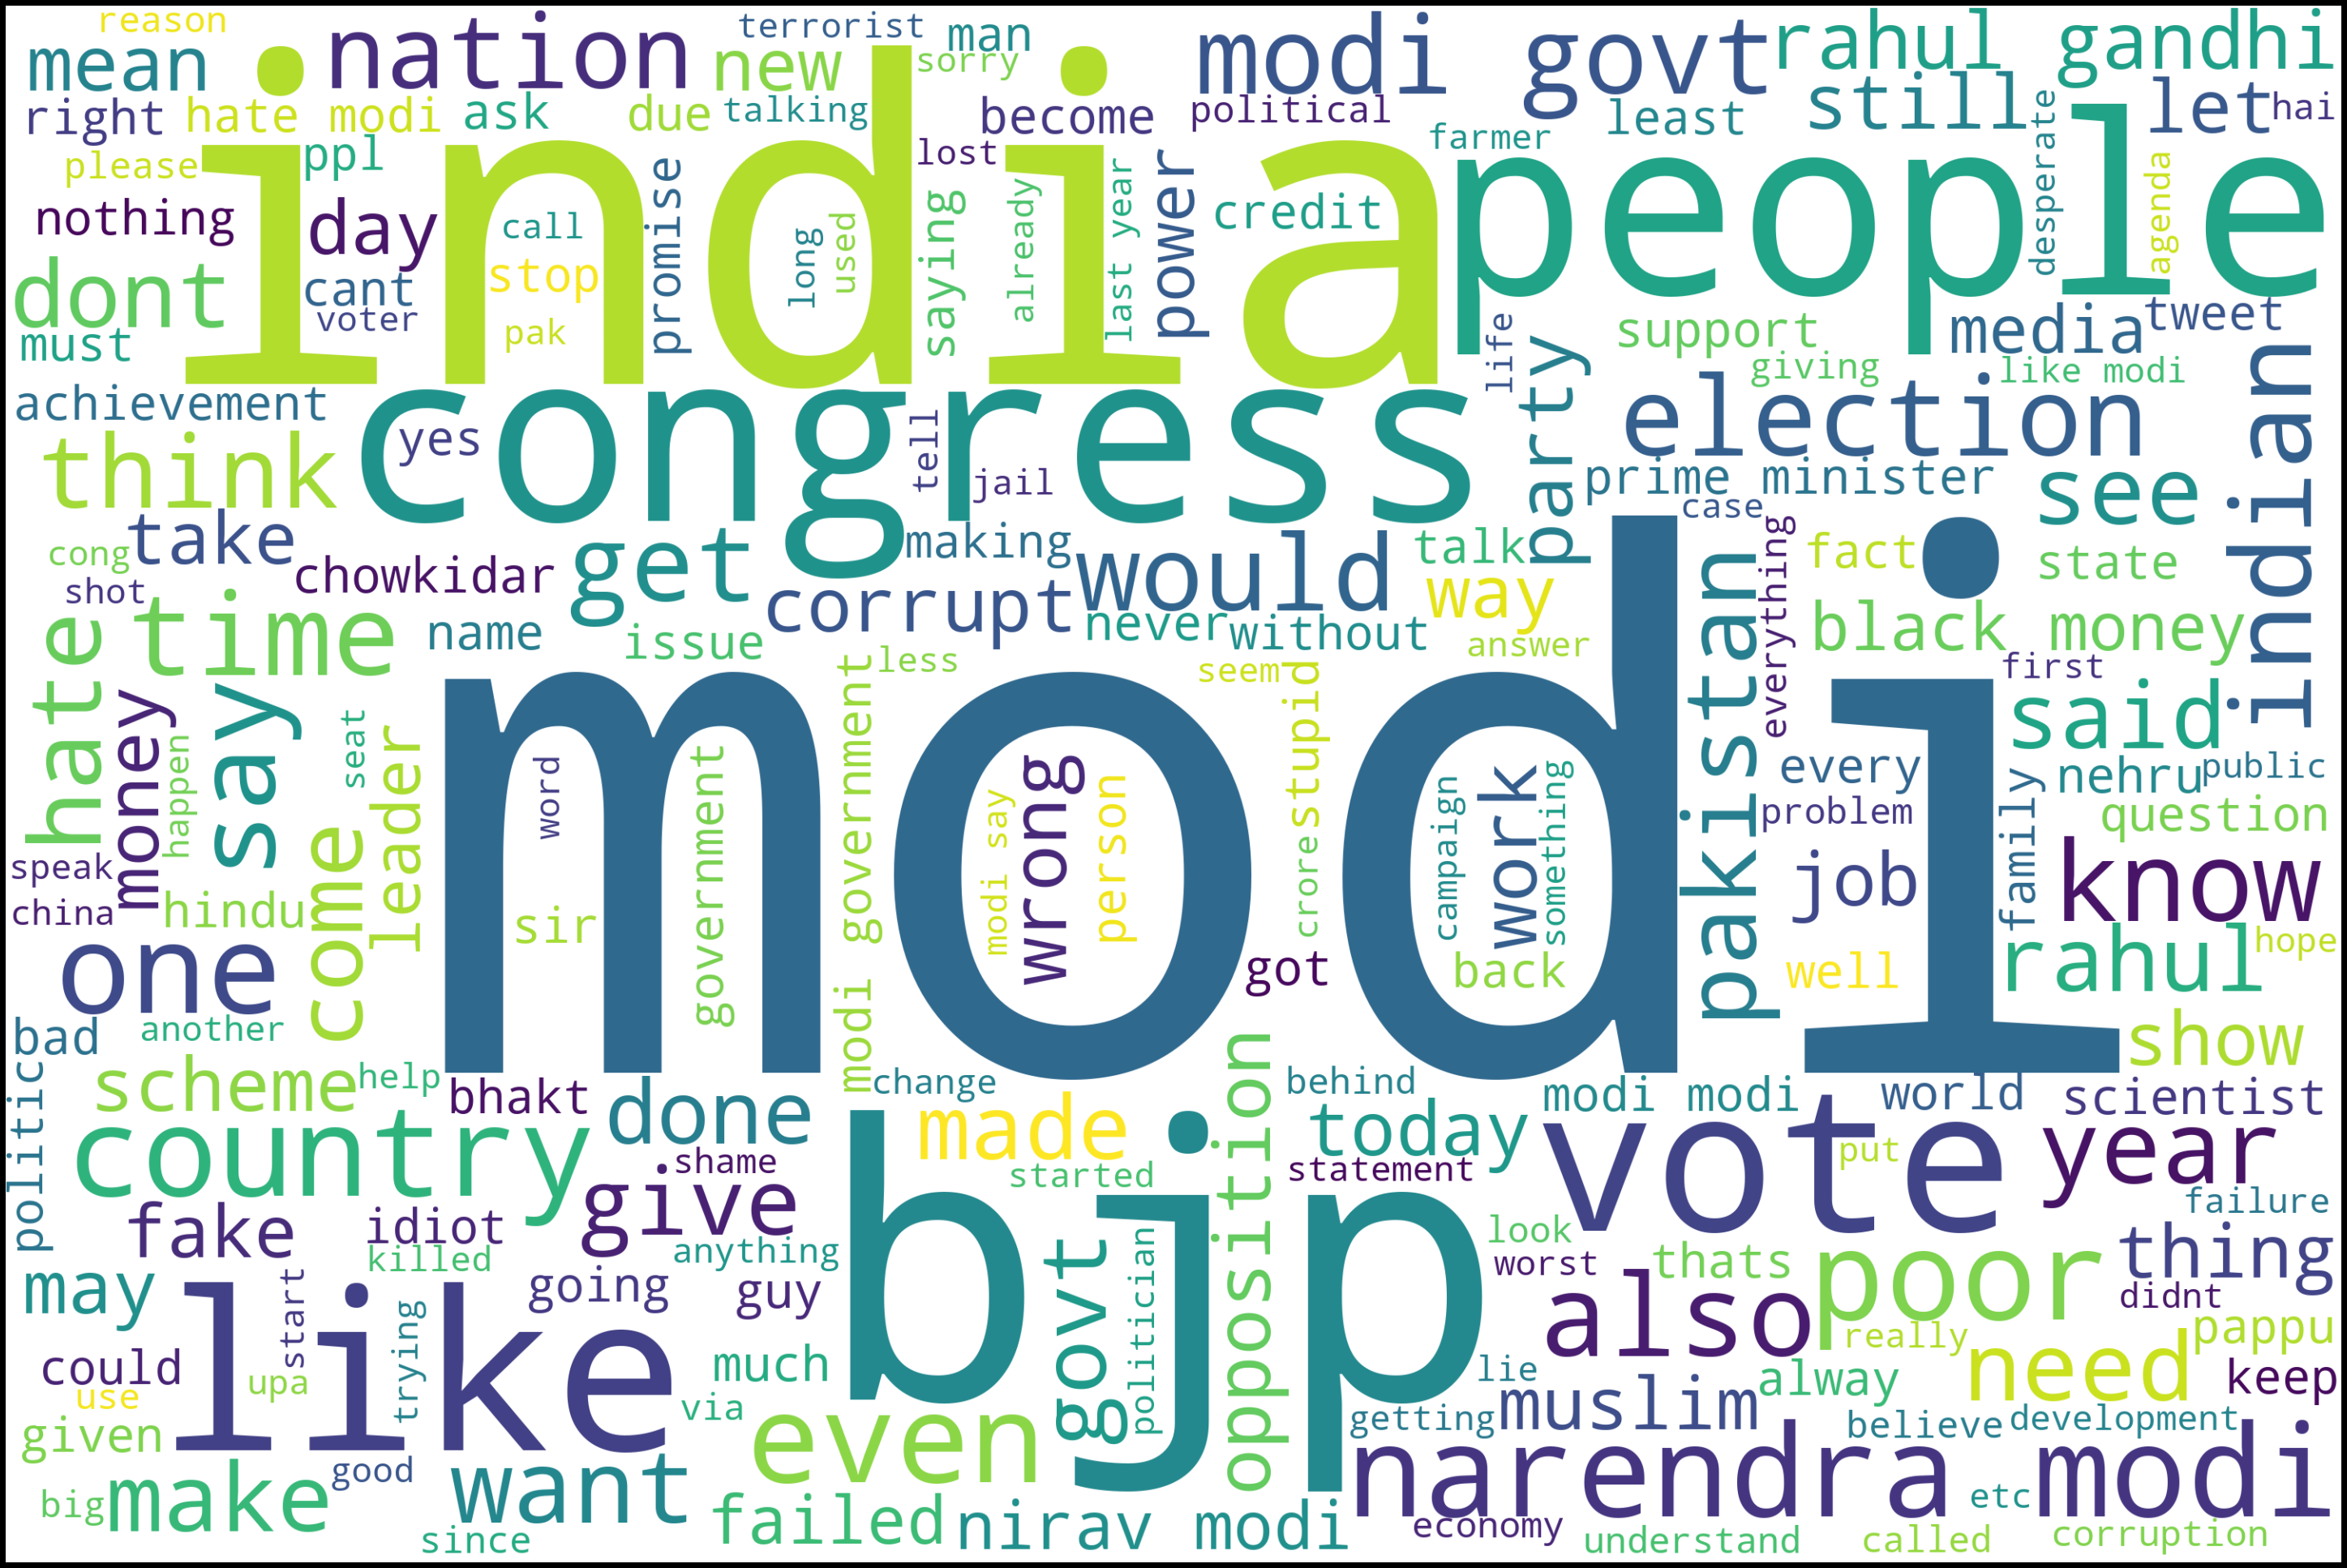

In [13]:
# negative tweets

text = ''

for tweet in df[df['category'] == -1.0 ]['clean_text']:
    text += f" {tweet}"
    
wordcloud = WordCloud(
width=3000, height=2000, background_color='white',
stopwords = set(nltk.corpus.stopwords.words("english"))).generate(text)

fig = plt.figure(figsize=(40,30), facecolor='k',edgecolor='k')

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show

del text

In [15]:
vec = CountVectorizer(max_features=10000)
vec.fit(df['clean_text'])

trn, val = train_test_split(df, test_size=0.3, random_state=42)

trn_abs = vec.transform(trn['clean_text'])
val_abs = vec.transform(val['clean_text'])

In [16]:
from sklearn.multiclass import OneVsRestClassifier
clf = OneVsRestClassifier(LogisticRegression(C = 10, n_jobs=-1))
clf.fit(trn_abs, trn['category'])

val_preds = clf.predict(val_abs)
f1_score(val['category'], val_preds, average='micro')

0.948947659078358

In [17]:
print(clf.score(val_abs, val['category']))

0.948947659078358


In [18]:
accuracy_score(val['category'], val_preds)

0.948947659078358

In [19]:
confusion_matrix(val['category'], val_preds)

array([[ 9572,   264,   855],
       [  198, 16215,   231],
       [  687,   261, 20608]], dtype=int64)

In [20]:
print(classification_report(val['category'], val_preds))

              precision    recall  f1-score   support

        -1.0       0.92      0.90      0.91     10691
         0.0       0.97      0.97      0.97     16644
         1.0       0.95      0.96      0.95     21556

    accuracy                           0.95     48891
   macro avg       0.94      0.94      0.94     48891
weighted avg       0.95      0.95      0.95     48891



In [21]:
vec = TfidfVectorizer(max_features=10000)
_ = vec.fit(list(df['clean_text']))

trn_abs = vec.transform(trn['clean_text'])
val_abs = vec.transform(val['clean_text'])

In [22]:
clf = OneVsRestClassifier(LogisticRegression(C = 10, n_jobs=-1))
_ = clf.fit(trn_abs, trn['category'])

val_preds = clf.predict(val_abs)
f1_score(val['category'], val_preds, average='micro')

# i've seen tfidf perform bad in another case as well...

0.9446728436726596

In [23]:
print(clf.score(val_abs, val['category']))

0.9446728436726596


In [24]:
# tokenize
tok = Tokenizer(num_words = 1000000)
# fit
tok.fit_on_texts(df['clean_text'].str.lower().tolist())

vocab_size = len(tok.word_index) + 1

In [25]:
X_trn = tok.texts_to_sequences(trn['clean_text'])
X_val = tok.texts_to_sequences(val['clean_text'])

In [26]:
maxlen = 200
X_trn = pad_sequences(X_trn, maxlen=maxlen)
X_val = pad_sequences(X_val, maxlen=maxlen)

In [27]:
embedding_dim = 50
vocab_size = len(tok.word_index) + 1

model = Sequential()
model.add(Embedding(input_dim=vocab_size,
                    output_dim=embedding_dim,
                    input_length=maxlen))

model.add(Flatten())
model.add(Dense(200, activation='relu', name = 'Fully_Connected'))
model.add(Dense(1, activation='sigmoid', name = 'Output'))
model.compile(optimizer=tf.keras.optimizers.Adam(lr = 1e-3),
              loss='binary_crossentropy',
              metrics=['accuracy'],
              )

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 200, 50)           5683950   
_________________________________________________________________
flatten (Flatten)            (None, 10000)             0         
_________________________________________________________________
Fully_Connected (Dense)      (None, 200)               2000200   
_________________________________________________________________
Output (Dense)               (None, 1)                 201       
Total params: 7,684,351
Trainable params: 7,684,351
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.fit(X_trn, trn['category'], validation_data=(X_val, val['category']), verbose=True, epochs=10, batch_size=256,
          callbacks = [tf.keras.callbacks.ReduceLROnPlateau()])

Epoch 1/10
446/446 [==============================] - 64s 143ms/step - loss: -27.7645 - accuracy: 0.5077 - val_loss: -139.1655 - val_accuracy: 0.5831
Epoch 2/10
446/446 [==============================] - 62s 139ms/step - loss: -746.0576 - accuracy: 0.5651 - val_loss: -1514.9343 - val_accuracy: 0.5790
Epoch 3/10
446/446 [==============================] - 68s 152ms/step - loss: -3609.0322 - accuracy: 0.5652 - val_loss: -5168.5410 - val_accuracy: 0.5306
Epoch 4/10
446/446 [==============================] - 68s 153ms/step - loss: -9674.4834 - accuracy: 0.5654 - val_loss: -11800.8428 - val_accuracy: 0.5679
Epoch 5/10
446/446 [==============================] - 62s 139ms/step - loss: -19566.8848 - accuracy: 0.5656 - val_loss: -21678.3164 - val_accuracy: 0.5575
Epoch 6/10
446/446 [==============================] - 62s 138ms/step - loss: -33751.4844 - accuracy: 0.5657 - val_loss: -35150.5430 - val_accuracy: 0.5528
Epoch 7/10
446/446 [==============================] - 62s 139ms/step - loss: -526

In [32]:
val_preds = model.predict(X_val)
val_preds = np.argmax(val_preds,axis=1)

In [34]:
f1_score(val['category'], val_preds, average='micro')

0.34043075412652635

In [35]:
accuracy_score(val['category'], val_preds)

0.34043075412652635

In [36]:
confusion_matrix(val['category'], val_preds)

array([[    0, 10691,     0],
       [    0, 16644,     0],
       [    0, 21556,     0]], dtype=int64)

In [37]:
print(classification_report(val['category'], val_preds))

              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00     10691
         0.0       0.34      1.00      0.51     16644
         1.0       0.00      0.00      0.00     21556

    accuracy                           0.34     48891
   macro avg       0.11      0.33      0.17     48891
weighted avg       0.12      0.34      0.17     48891

